# PN2V Training
Here we will use the generated noise model and train a PN2V network on single noisy images.
Please run the 'Convallaria-1-CreateNoiseModel' notebook first.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from unet.model import UNet

from pn2v import utils
from pn2v import histNoiseModel
from pn2v import training
from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Load Data

In [2]:
path='data/Convallaria_diaphragm/'

# Load the training data
data=imread(path+'20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif')

In [3]:
# We are loading the histogram from the 'Convallaria-1-CreateNoiseModel' notebook
histogram=np.load(path+'noiseModel.npy')

# Create a NoiseModel object from the histogram.
noiseModel=histNoiseModel.NoiseModel(histogram, device=device)

### Create the Network and Train it
This can take a while.

In [4]:
# Create a network with 800 output channels that are interpreted as samples from the prior.
net = UNet(800, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix='conv', directory=path, noiseModel=noiseModel,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=5, virtualBatchSize=20,
                                           batchSize=1, learningRate=1e-3)

/home/krull/projects/pn2vCheck/pn2v/unet/model.py:215: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  init.xavier_normal(m.weight)
/home/krull/projects/pn2vCheck/pn2v/unet/model.py:216: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias, 0)


Epoch 0 finished      
avg. loss: 4.089759075641632+-(2SEM)0.12026341607949252      
Epoch 1 finished      
avg. loss: 3.639772868156433+-(2SEM)0.11503529183822184      
Epoch 2 finished      
avg. loss: 3.3973047852516176+-(2SEM)0.07890816372323652      
Epoch 3 finished      
avg. loss: 3.2314443588256836+-(2SEM)0.08818115890623167      
Epoch 4 finished      
avg. loss: 3.334096837043762+-(2SEM)0.14057031427579395      
Epoch 5 finished      
avg. loss: 3.1251014113426208+-(2SEM)0.12321941811626058      
Epoch 6 finished      
avg. loss: 3.1607281804084777+-(2SEM)0.1026232046439824      
Epoch 7 finished      
avg. loss: 3.0416570782661436+-(2SEM)0.08162758531355314      
Epoch 8 finished      
avg. loss: 2.9617292165756224+-(2SEM)0.0941533955891487      
Epoch 9 finished      
avg. loss: 3.0457193732261656+-(2SEM)0.10268263079265588      
Epoch 10 finished      
avg. loss: 3.025261652469635+-(2SEM)0.08855933389405661      
Epoch 11 finished      
avg. loss: 2.9870091915130614+-(2SE

avg. loss: 3.0089614391326904+-(2SEM)0.07491113073267992      
Epoch 93 finished      
avg. loss: 2.9971357703208925+-(2SEM)0.09450119084365638      
Epoch 94 finished      
avg. loss: 2.920409154891968+-(2SEM)0.07208078122480653      
Epoch 95 finished      
avg. loss: 3.0453878045082092+-(2SEM)0.10026367465819444      
Epoch 96 finished      
avg. loss: 2.9590693354606628+-(2SEM)0.07328501094504418      
Epoch 97 finished      
avg. loss: 2.9206487417221068+-(2SEM)0.11063813904317488      
Epoch 98 finished      
avg. loss: 2.9798823237419128+-(2SEM)0.059885246063534917      
Epoch 99 finished      
avg. loss: 2.97254341840744+-(2SEM)0.08273064061293679      
Epoch 100 finished      
avg. loss: 3.001618003845215+-(2SEM)0.09691676992937631      
Epoch   100: reducing learning rate of group 0 to 3.1250e-05.
Epoch 101 finished      
avg. loss: 2.977292609214783+-(2SEM)0.12349163769554848      
Epoch 102 finished      
avg. loss: 3.0236170887947083+-(2SEM)0.08818519801089808      
Epoch 

Epoch 181 finished      
avg. loss: 2.9206062078475954+-(2SEM)0.1185963221519298      
Epoch 182 finished      
avg. loss: 2.970108759403229+-(2SEM)0.06868438829663272      
Epoch 183 finished      
avg. loss: 2.9398975372314453+-(2SEM)0.09176110833871043      
Epoch 184 finished      
avg. loss: 2.9660026907920836+-(2SEM)0.1052472006213557      
Epoch 185 finished      
avg. loss: 2.901454448699951+-(2SEM)0.10341140633291729      
Epoch 186 finished      
avg. loss: 2.946291136741638+-(2SEM)0.10480967986960914      
Epoch 187 finished      
avg. loss: 2.9465633273124694+-(2SEM)0.08113772229513888      
Epoch 188 finished      
avg. loss: 2.9161665439605713+-(2SEM)0.1113127110756062      
Epoch   188: reducing learning rate of group 0 to 1.2207e-07.
Epoch 189 finished      
avg. loss: 2.9172777414321898+-(2SEM)0.09284095001376395      
Epoch 190 finished      
avg. loss: 3.002373516559601+-(2SEM)0.08709477385801133      
Epoch 191 finished      
avg. loss: 2.966343343257904+-(2SEM)0.12

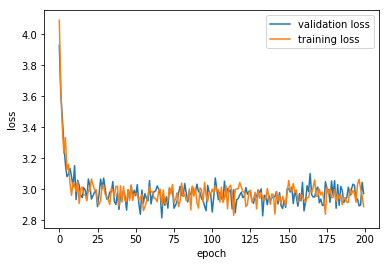

In [5]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()